In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

In [2]:
?# import torch
torch.cuda.empty_cache()

Object `# import torch` not found.


In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
# !unzip akshit_sum.zip

In [5]:
data1 = np.load('akshit_sum/data0.npy')
data2 = np.load('akshit_sum/data1.npy')
data3 = np.load('akshit_sum/data2.npy')
lab1 = np.load('akshit_sum/lab0.npy')
lab2 = np.load('akshit_sum/lab1.npy')
lab3 = np.load('akshit_sum/lab2.npy')

In [6]:
X = np.concatenate((data1,data2,data3))
Y = np.concatenate((lab1,lab2,lab3))
X = (X-0)/(255-0)
X = np.expand_dims(X, 1)      # if numpy array
# indices = np.arange(len(X))
# random.shuffle(indices)
train_x = X[:int(0.8*len(X))]
val_x = X[int(0.8*len(X)):]

train_y = Y[:int(0.8*len(Y))]
val_y = Y[int(0.8*len(Y)):]

train_x = torch.tensor(train_x)
val_x = torch.tensor(val_x)

train_y = torch.LongTensor(train_y)
val_y = torch.LongTensor(val_y)

In [7]:
X.shape

(30000, 1, 40, 168)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [9]:
class SumNet(torch.nn.Module):
    def __init__(self):
        super(SumNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1,2,3,1)
        self.conv2 = torch.nn.Conv2d(2,4,3,1,padding=1)
        self.conv_bn_2 = torch.nn.BatchNorm2d(4)
        self.conv3 = torch.nn.Conv2d(4,8,3,1,padding=1)
        self.conv4 = torch.nn.Conv2d(8,16,3,1,padding=1)
        self.conv_bn_4 = torch.nn.BatchNorm2d(16)
        self.conv5 = torch.nn.Conv2d(16,32,3,1,padding=1)
        self.conv6 = torch.nn.Conv2d(32,64,3,1,padding=1)
        self.conv_bn_6 = torch.nn.BatchNorm2d(64)
        self.conv7 = torch.nn.Conv2d(64,64,3,1,padding=1)
        self.conv8 = torch.nn.Conv2d(64,128,3,1,padding=1)
        self.conv_bn_8 = torch.nn.BatchNorm2d(128)
        self.conv9 = torch.nn.Conv2d(128,128,3,1,padding=1)
        self.conv10 = torch.nn.Conv2d(128,256,3,1,padding=1)
        self.conv_bn_10 = torch.nn.BatchNorm2d(256)
        self.conv11 = torch.nn.Conv2d(256,256,3,1,padding=0)
        self.conv12 = torch.nn.Conv2d(256,512,3,1,padding=0)
        self.conv_bn_12 = torch.nn.BatchNorm2d(512)

        self.fc1 = torch.nn.Linear(512,256)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.fc2 = torch.nn.Linear(256,37)
#         self.dropout2 = torch.nn.Dropout(0.6)
#         self.fc3 = torch.nn.Linear(64, 37)
#         self.dropout3 = torch.nn.Dropout(0.8)
#         self.fc4 = torch.nn.Linear(128, 37)



    def forward(self,x):
        x=self.conv1(x)
        x=torch.nn.functional.relu(x)
        x=self.conv2(x)
        x=torch.nn.functional.relu(x)
        x = self.conv_bn_2(x)
        x=torch.nn.functional.max_pool2d(x,kernel_size = [1,2],stride=[1,2],padding=[0,1])
        x=self.conv3(x)
        x=torch.nn.functional.relu(x)
        x=self.conv4(x)
        x=torch.nn.functional.relu(x)
        x = self.conv_bn_4(x)
        x=torch.nn.functional.max_pool2d(x,kernel_size = [1,2],stride=[1,2],padding=[0,1])
        # print(x.shape)
        x=self.conv5(x)
        x=torch.nn.functional.relu(x)
        x=self.conv6(x)
        x=torch.nn.functional.relu(x)
        x = self.conv_bn_6(x)
        x=torch.nn.functional.max_pool2d(x,kernel_size = [2,2],stride=[2,2],padding=[1,0])
        x=self.conv7(x)
        x=torch.nn.functional.relu(x)
        x=self.conv8(x)
        x=torch.nn.functional.relu(x)
        x=torch.nn.functional.max_pool2d(x,kernel_size = [2,2],stride=[2,2],padding=[1,0])
        x = self.conv_bn_8(x)
        # # print(x.shape)
        x=self.conv9(x)
        x=torch.nn.functional.relu(x)
        x=self.conv10(x)
        x=torch.nn.functional.relu(x)
        x=torch.nn.functional.max_pool2d(x,kernel_size = [2,2],stride=[2,2])
        x = self.conv_bn_10(x)
        x=self.conv11(x)
        x=torch.nn.functional.relu(x)
        x=self.conv12(x)
        x=torch.nn.functional.relu(x)
#         x=torch.nn.functional.max_pool2d(x,kernel_size = [2,2],stride=[2,2])
        x = self.conv_bn_12(x)
#         print(x.shape)
        x = torch.flatten(x, 1)
#         print("Size",x.shape)
        x = self.fc1(x)
        x = torch.nn.functional.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
#         x = torch.nn.functional.relu(x)
#         x = self.dropout2(x)
#         x = self.fc3(x)
#         x = torch.nn.functional.relu(x)
#         x = self.dropout3(x)
#         x = self.fc4(x)

        # output = F.log_softmax(x, dim=1)
        return x

In [10]:
model = SumNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',verbose=True,patience=240)
if torch.cuda.is_available():
    model = model.cuda()
    loss = loss.cuda()
    train_y = train_y.cuda()
    train_x = train_x.cuda()
    val_y = val_y.cuda()
    val_x = val_x.cuda()
print(model)

SumNet(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv9): Conv2d(

In [11]:
def get_accuracy(pred,y):
    accu_sum=0
    for i in range(len(y)):
        maxi=-100000
        maxind=-1
        for j in range(37):
          # print(pred[i][j])
          if pred[i][j] >= maxi:
              maxind = j
              maxi=pred[i][j]
        if(maxind==y[i]):
            accu_sum+=1
        
    return accu_sum

In [16]:
index_list = np.arange(24000)
val_index_list = np.arange(6000)

train_losses= []
val_losses = []

train_accs = []
val_accs = []

batch_size = 300
cnt=-1
for epochs in range(100):
  acc_sum_ep_val = 0
  acc_sum_ep_trn = 0

  random.shuffle(index_list)
  for batch_no in range(int(len(train_x)/batch_size)):
    cnt+=1
    # print(index_list[batch_size*batch_no:batch_size*(batch_no+1)])
    train_batch_x = train_x[index_list[batch_size*batch_no:batch_size*(batch_no+1)]] 
    train_batch_y = train_y[index_list[batch_size*batch_no:batch_size*(batch_no+1)]]

    output_train = model(train_batch_x.float())
    loss_train = loss(output_train, train_batch_y)
    train_losses.append(loss_train.item())
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if(cnt%1==0):
      random.shuffle(val_index_list)
      val_batch_x = val_x[val_index_list[:500]]
      val_batch_y = val_y[val_index_list[:500]]

      output_val = model(val_batch_x.float())
      loss_val = loss(output_val, val_batch_y)
      val_losses.append(loss_val.item())
      scheduler.step(loss_val.item())
    else:
      val_losses.append(val_losses[-1])

    if(cnt%1==0):
      acc_tmp = get_accuracy(output_val.cpu().detach().numpy(),val_batch_y.cpu().detach().numpy())
      acc_sum_ep_val+=acc_tmp
      val_accs.append(acc_tmp/500)
      acc_tmp = get_accuracy(output_train.cpu().detach().numpy(),train_batch_y.cpu().detach().numpy())
      acc_sum_ep_trn+=acc_tmp
      train_accs.append(acc_tmp/batch_size)

  for param_group in optimizer.param_groups:
        lr = param_group['lr']

  if(lr<0.0000001):
    break

  print("Epoch #",epochs,"Completed")
  print(train_losses[-1],val_losses[-1])
  print(acc_sum_ep_trn/len(train_x),acc_sum_ep_val/(500*int(len(train_x)/batch_size)))
  # if(epochs>=5):
  #   inp = input()
  #   if(inp == "s"):
  #     break

Epoch # 0 Completed
2.842319965362549 2.8668627738952637
0.07133333333333333 0.071375
Epoch # 1 Completed
2.5261292457580566 2.524479866027832
0.121125 0.11255
Epoch # 2 Completed
2.2371721267700195 2.302424907684326
0.16554166666666667 0.159925
Epoch # 3 Completed
2.062661647796631 2.0926098823547363
0.20441666666666666 0.19025
Epoch # 4 Completed
2.0755865573883057 2.013603925704956
0.24358333333333335 0.22525
Epoch # 5 Completed
1.8730725049972534 1.8063042163848877
0.281375 0.257575
Epoch # 6 Completed
1.6587549448013306 1.9023109674453735
0.30783333333333335 0.285675
Epoch # 7 Completed
1.597712755203247 1.777189016342163
0.336 0.31295
Epoch # 8 Completed
1.4269031286239624 1.8110798597335815
0.355375 0.322525
Epoch # 9 Completed
1.4998295307159424 1.6369822025299072
0.4154583333333333 0.354275
Epoch # 10 Completed
1.518065333366394 1.622853398323059
0.435875 0.3778
Epoch # 11 Completed
1.5229274034500122 1.524061679840088
0.46166666666666667 0.398425
Epoch # 12 Completed
1.149691

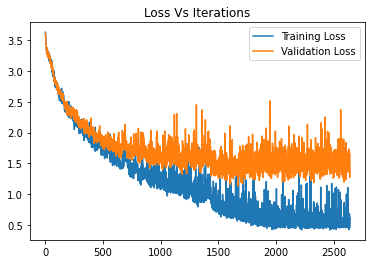

In [17]:
plt.plot(train_losses,label="Training Loss")
plt.plot(val_losses,label="Validation Loss")
plt.title("Loss Vs Iterations")
plt.legend()

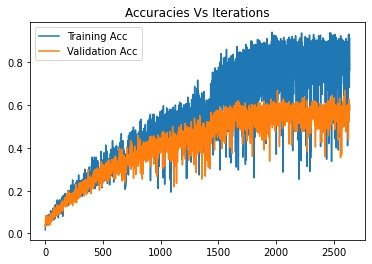

In [18]:
plt.plot(train_accs,label="Training Acc")
plt.plot(val_accs,label="Validation Acc")
plt.title("Accuracies Vs Iterations")
plt.legend()

In [19]:
# Accuracies

In [20]:
batch_size = 500
correct_preds=0
for batch_no in range(int(len(train_x)/batch_size)):
    train_batch_x = train_x[batch_size*batch_no:batch_size*(batch_no+1)] 
    train_batch_y = train_y[batch_size*batch_no:batch_size*(batch_no+1)]
    output_train = model(train_batch_x.float())
    correct_preds+=get_accuracy(output_train.cpu().detach().numpy(),train_batch_y.cpu().detach().numpy())
print("Overall Train Accuracy: ",100*correct_preds/len(train_x))

RuntimeError: CUDA out of memory. Tried to allocate 54.00 MiB (GPU 0; 10.92 GiB total capacity; 9.94 GiB already allocated; 45.00 MiB free; 427.81 MiB cached)

In [21]:
batch_size = 100
correct_preds=0
for batch_no in range(int(len(val_x)/batch_size)):
    val_batch_x = val_x[batch_size*batch_no:batch_size*(batch_no+1)] 
    val_batch_y = val_y[batch_size*batch_no:batch_size*(batch_no+1)]
    output_val = model(val_batch_x.float())
    correct_preds+=get_accuracy(output_val.cpu().detach().numpy(),val_batch_y.cpu().detach().numpy())
print("Overall Validation Accuracy: ",100*correct_preds/len(val_x))

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 10.92 GiB total capacity; 10.08 GiB already allocated; 5.00 MiB free; 325.18 MiB cached)

In [22]:
#saving and loading the model

In [24]:
torch.save(model,"SumNet_final_model_2")

/home/jashn.arora/anaconda3/envs/tf-gpu-cuda/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SumNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jashn.arora/anaconda3/envs/tf-gpu-cuda/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jashn.arora/anaconda3/envs/tf-gpu-cuda/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jashn.arora/anaconda3/envs/tf-gpu-cuda/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type L

In [ ]:
from google.colab import files
files.download('SumNet_inital_model_2') 

In [12]:
saved_model = torch.load("SumNet_final_model_2")

In [13]:
saved_model.eval()

SumNet(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn_8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv9): Conv2d(

In [14]:
batch_size = 500
correct_preds=0
for batch_no in range(int(len(train_x)/batch_size)):
    train_batch_x = train_x[batch_size*batch_no:batch_size*(batch_no+1)] 
    train_batch_y = train_y[batch_size*batch_no:batch_size*(batch_no+1)]
    output_train = saved_model(train_batch_x.float())
    correct_preds+=get_accuracy(output_train.cpu().detach().numpy(),train_batch_y.cpu().detach().numpy())
print("Overall Train Accuracy: ",100*correct_preds/len(train_x))

Overall Train Accuracy:  96.28333333333333


In [15]:
batch_size = 500
correct_preds=0
for batch_no in range(int(len(val_x)/batch_size)):
    val_batch_x = val_x[batch_size*batch_no:batch_size*(batch_no+1)] 
    val_batch_y = val_y[batch_size*batch_no:batch_size*(batch_no+1)]
    output_val = saved_model(val_batch_x.float())
    correct_preds+=get_accuracy(output_val.cpu().detach().numpy(),val_batch_y.cpu().detach().numpy())
print("Overall Validation Accuracy: ",100*correct_preds/len(val_x))

Overall Validation Accuracy:  61.916666666666664


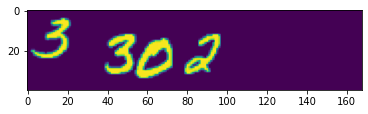

8 8


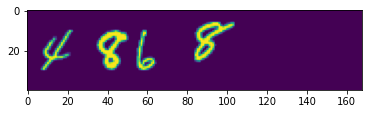

25 26


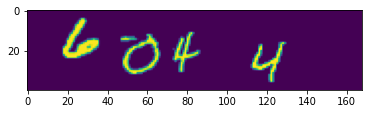

14 14


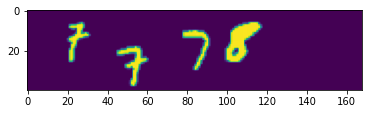

28 29


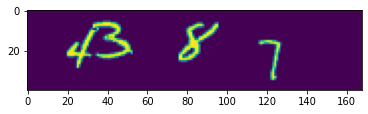

22 22


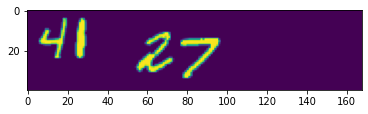

14 14


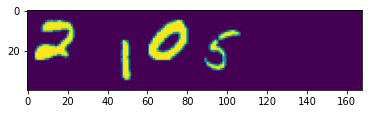

8 8


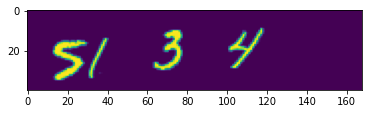

13 13


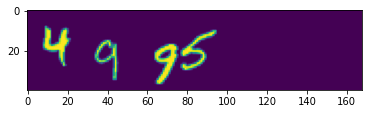

27 27


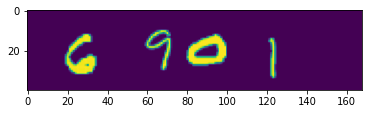

16 16


In [16]:
# for i in range(10):

output_first_10 = saved_model(val_x[:10].float())
for i in range(len(output_first_10)):
    plt.imshow(val_x[i].cpu().detach().numpy().reshape(40,168))
    plt.show()

    maxi = 0
    for j in range(len(output_first_10[0])):
        if output_first_10[i][maxi] <= output_first_10[i][j]: 
            maxi = j
    print(maxi,val_y[i].cpu().detach().numpy())